<a href="https://colab.research.google.com/github/ashivashankars/CMPE255_Assignments/blob/main/CRISP_DM_end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PreRequisties


In [2]:
# ‚úÖ Run this once per session
!pip install -q \
    lightgbm xgboost catboost shap imbalanced-learn \
    pandas==2.2.2 scikit-learn==1.5.2 numpy matplotlib plotly seaborn \
    fastapi uvicorn[standard] pydantic==2.9.2 streamlit pyarrow


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 149.4/149.4 kB 7.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.9/12.9 MB 78.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 434.9/434.9 kB 33.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.1/2.1 MB 61.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 8.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.2/10.2 MB 85.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [3]:
!pip -q install kaggle


In [4]:
!git clone https://github.com/ashivashankars/CMPE255_Assignments.git

Cloning into 'CMPE255_Assignments'...
remote: Enumerating objects: 245, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 245 (delta 115), reused 136 (delta 48), pack-reused 0 (from 0)
Receiving objects: 100% (245/245), 11.80 MiB | 9.54 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [5]:
import json, os
from getpass import getpass

token = getpass('Paste your kaggle.json content here')
os.makedirs('/root/.kaggle', exist_ok=True)
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write(token)
os.chmod('/root/.kaggle/kaggle.json', 0o600)


Paste your kaggle.json content here¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


In [6]:
!kaggle datasets download -d ayeshaimran123/social-media-and-mental-health-balance -p data --force


Dataset URL: https://www.kaggle.com/datasets/ayeshaimran123/social-media-and-mental-health-balance
License(s): ODC Public Domain Dedication and Licence (PDDL)
  0% 0.00/5.80k [00:00<?, ?B/s]
100% 5.80k/5.80k [00:00<00:00, 25.0MB/s]


In [7]:
# Repro seeds
import os, random, numpy as np
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED); np.random.seed(SEED)

# Versions (pin in requirements.txt)
import sklearn, pandas as pd, matplotlib, scipy
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)
print("matplotlib", matplotlib.__version__)
print("scipy", scipy.__version__)


pandas 2.2.2
sklearn 1.5.2
matplotlib 3.10.0
scipy 1.16.3


#1) Business Objective & Questions (textbook-quality framing)

Context. The dataset describes the relationship between social-media use and well-being (e.g., screen time, stress, sleep). (Kaggle listing confirms scope; we‚Äôll verify exact columns in the next chunk.)
kaggle.com
+1

Primary analytic questions

Descriptive: What are the distributions of screen hours, stress level, sleep quality, and any other well-being indicators?

Associational: How do screen hours relate to stress and sleep quality after basic adjustment (age/gender if present)?

Predictive (stretch, only if the column exists): Can we predict a target (e.g., income) from behavior and well-being? If income is not in the dataset, we will pivot to a defensible alternative target (e.g., stress_level or sleep_quality) and document the deviation.

Success criteria (measurable)

EDA produces clean, typed, validated dataset with a documented data dictionary.

For prediction: establish a na√Øve baseline (e.g., mean regressor for continuous target) and beat it by ‚â• 20% RMSE (or MAE), validated via 5x repeated CV + held-out test.

Deliver a short playbook with policy suggestions (e.g., screen-time bands associated with lower stress), citing literature for plausibility.

Constraints

Compute-aware: small CSV allows local analysis; still, we‚Äôll use streaming reads, down-sampling for expensive diagnostics, and bounded hyper-param grids.

Data limits: self-report bias; cross-sectional (no causal claims). We‚Äôll explicitly avoid causal language.

Ethics & harm minimization

No individual-level flagging; aggregate insights only.

Avoid over-interpretation; align with mental-health research caution

##2) Data-Understanding Audit Plan (what we will check next)

Schema discovery

Load CSV; infer dtypes; detect mixed types; compact memory.

Data dictionary draft

For each column: name, type, allowed values/range, units, missingness, semantic role (ID/feature/target/leak).

Quality checks

Row/column counts; duplicates; missingness map; impossible values (e.g., negative hours of screen time).

Consistency rules: value sets for categorical variables; spelling variants; ordinal encodings (e.g., ‚ÄúLow/Medium/High‚Äù).

Target presence: confirm whether income exists; if not, we‚Äôll transparently switch target to a present, meaningful continuous variable (e.g., sleep quality index) and re-cast the modeling objective.

In [8]:
import pandas as pd, numpy as np
from pathlib import Path

PATH = Path("data")
# Update the exact filename after you download
csv_path = next(PATH.glob("*.csv"))
df = pd.read_csv(csv_path)

# Basic profile (compute-light)
n_rows, n_cols = df.shape
print(f"Rows: {n_rows}, Cols: {n_cols}")
display(df.head(3))
display(df.tail(3))
display(df.sample(min(5, len(df)), random_state=SEED))
df.info()

# Missingness & duplicates
missing_pct = df.isna().mean().sort_values(ascending=False)
dupe_rows = df.duplicated().sum()
print("Duplicate rows:", dupe_rows)
display(missing_pct.to_frame("missing_pct").query("missing_pct>0"))

# Cardinality & value sets (bounded to avoid log spam)
summary = []
for c in df.columns:
    s = df[c]
    summary.append({
        "col": c,
        "dtype": s.dtype.name,
        "n_unique": s.nunique(dropna=True),
        "example_values": s.dropna().unique()[:5]
    })
pd.DataFrame(summary).sort_values("n_unique").head(15)


Rows: 500, Cols: 10


User_ID  Age Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44   Male                     3.1                  7.0   
1    U002   30  Other                     5.1                  7.0   
2    U003   23  Other                     7.4                  6.0   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0                 6.0                        2.0                       5.0   
1                 8.0                        5.0                       3.0   
2                 7.0                        1.0                       3.0   

  Social_Media_Platform  Happiness_Index(1-10)  
0              Facebook                   10.0  
1              LinkedIn                   10.0  
2               YouTube                    6.0

User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
497    U498   41    Male                     7.7                  5.0   
498    U499   23    Male                     4.2                  9.0   
499    U500   43  Female                     5.9                  5.0   

     Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
497                 7.0                        2.0                       2.0   
498                 7.0                        0.0                       2.0   
499                 8.0                        3.0                       3.0   

    Social_Media_Platform  Happiness_Index(1-10)  
497              LinkedIn                    8.0  
498              Facebook                    9.0  
499           X (Twitter)                    7.0

User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
361    U362   39  Female                     6.6                  6.0   
73     U074   26  Female                     4.8                  6.0   
374    U375   17    Male                     5.8                  6.0   
155    U156   19  Female                     5.2                  7.0   
104    U105   19    Male                     7.2                  5.0   

     Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
361                 7.0                        3.0                       1.0   
73                  6.0                        1.0                       4.0   
374                 7.0                        1.0                       5.0   
155                 5.0                        4.0                       4.0   
104                 6.0                        1.0                       0.0   

    Social_Media_Platform  Happiness_Index(1-10)  
361             Instagram                    7.0  
73               LinkedIn                    8.0  
374                TikTok                    9.0  
155              LinkedIn                   10.0  
104              LinkedIn                    9.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB
Duplicate rows: 0


Empty DataFrame
Columns: [missing_pct]
Index: []

col    dtype  n_unique  \
2                     Gender   object         3   
8      Social_Media_Platform   object         6   
9      Happiness_Index(1-10)  float64         7   
7   Exercise_Frequency(week)  float64         8   
6  Days_Without_Social_Media  float64         9   
5         Stress_Level(1-10)  float64         9   
4        Sleep_Quality(1-10)  float64         9   
1                        Age    int64        34   
3     Daily_Screen_Time(hrs)  float64        82   
0                    User_ID   object       500   

                                      example_values  
2                              [Male, Other, Female]  
8  [Facebook, LinkedIn, YouTube, TikTok, X (Twitt...  
9                         [10.0, 6.0, 8.0, 7.0, 9.0]  
7                          [5.0, 3.0, 1.0, 0.0, 4.0]  
6                          [2.0, 5.0, 1.0, 4.0, 6.0]  
5                         [6.0, 8.0, 7.0, 10.0, 4.0]  
4                          [7.0, 6.0, 4.0, 5.0, 8.0]  
1                               [44, 30, 23, 36, 34]  
3                          [3.1, 5.1, 7.4, 5.7, 7.0]  
0                     [U001, U002, U003, U004, U005]

#Chunk 2 ‚Äî CRISP-DM: Data Understanding (schema, dictionary draft, quality checks, first EDA scans)

I‚Äôm staying in ‚Äúruthless professor‚Äù mode. We‚Äôll load the dataset, enumerate columns/dtypes, draft a data dictionary, quantify missingness/duplicates, and run compute-light sanity checks. I also verify the public listing you named: Kaggle ‚Üí ayeshaimran123/social-media-and-mental-health-balance (description focuses on screen hours, stress, sleep quality; the page does not advertise an income field). We‚Äôll confirm in-notebook; if income is not present, we‚Äôll document a pivot target before modeling

1) Load safely + snapshot provenance

Principle: Nothing proceeds unless you can re-load the same bytes later.

In [9]:
from pathlib import Path
import pandas as pd, numpy as np, hashlib, json, textwrap, os

SEED = 42
DATA_DIR = Path("data")
csv_candidates = list(DATA_DIR.glob("*.csv"))
assert csv_candidates, "No CSV found in ./data. Place the Kaggle CSV there."
CSV_PATH = csv_candidates[0]  # If multiple, choose deliberately instead

# byte-level fingerprint for provenance
with open(CSV_PATH, "rb") as f:
    raw = f.read()
sha256 = hashlib.sha256(raw).hexdigest()
print("DATA_FILE:", CSV_PATH.name, "\nSHA256:", sha256, "\nBYTES:", len(raw))

# memory-aware load
df = pd.read_csv(CSV_PATH, low_memory=False)
print(df.shape)
df.head(3)


DATA_FILE: Mental_Health_and_Social_Media_Balance_Dataset 2.csv 
SHA256: 908eff92c53753b0dad66a601f350ba558201a45a2a3be7c06ace9043182a6dc 
BYTES: 23915
(500, 10)


User_ID  Age Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44   Male                     3.1                  7.0   
1    U002   30  Other                     5.1                  7.0   
2    U003   23  Other                     7.4                  6.0   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0                 6.0                        2.0                       5.0   
1                 8.0                        5.0                       3.0   
2                 7.0                        1.0                       3.0   

  Social_Media_Platform  Happiness_Index(1-10)  
0              Facebook                   10.0  
1              LinkedIn                   10.0  
2               YouTube                    6.0

2) Schema discovery + compact dtypes

Principle: make dtypes explicit (prevent silent string‚Üînumber errors).

In [10]:
# quick info
df.info()

# identify suspect numeric-looking columns stored as object
obj_maybe_num = [c for c in df.select_dtypes("object").columns
                 if df[c].dropna().astype(str).str.fullmatch(r"-?\d+(\.\d+)?").mean() > 0.8]

# make a copy for typed frame (we always keep raw df)
t = df.copy()
for c in obj_maybe_num:
    t[c] = pd.to_numeric(t[c], errors="coerce")

# simple categorical suggestion: low-cardinality objects
low_card = [c for c in t.select_dtypes("object").columns if t[c].nunique(dropna=True) <= 20]
cat_map = {c:"category" for c in low_card}
t = t.astype(cat_map)

t.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  

3) First look: completeness, duplication, cardinality

In [11]:
n_rows, n_cols = t.shape
print(f"Rows={n_rows} Cols={n_cols}")
dup_rows = t.duplicated().sum()
print("Duplicate rows:", dup_rows)

missing = t.isna().mean().sort_values(ascending=False)
missing_df = missing.to_frame("missing_rate").assign(n_missing=lambda d: (d["missing_rate"]*n_rows).round().astype(int))
missing_df.head(10)


Rows=500 Cols=10
Duplicate rows: 0


missing_rate  n_missing
User_ID                             0.0          0
Age                                 0.0          0
Gender                              0.0          0
Daily_Screen_Time(hrs)              0.0          0
Sleep_Quality(1-10)                 0.0          0
Stress_Level(1-10)                  0.0          0
Days_Without_Social_Media           0.0          0
Exercise_Frequency(week)            0.0          0
Social_Media_Platform               0.0          0
Happiness_Index(1-10)               0.0          0

Action rule (document in a Decision Log):

If missing_rate > 0.2 on any feature, justify either imputation strategy or exclusion.

If duplicates > 0, decide: true duplicates ‚áí drop; near-dupes ‚áí define rule.

4) Draft a Data Dictionary (auto-generated skeleton)

In [12]:
def summarize_column(s):
    return {
        "dtype": str(s.dtype),
        "n_missing": int(s.isna().sum()),
        "missing_rate": float(s.isna().mean()),
        "n_unique": int(s.nunique(dropna=True)),
        "example_values": s.dropna().unique()[:5].tolist()
    }

dictionary = {c: summarize_column(t[c]) for c in t.columns}
pd.DataFrame(dictionary).T.sort_values("n_unique").head(15)


dtype n_missing missing_rate n_unique  \
Gender                     category         0          0.0        3   
Social_Media_Platform      category         0          0.0        6   
Happiness_Index(1-10)       float64         0          0.0        7   
Exercise_Frequency(week)    float64         0          0.0        8   
Sleep_Quality(1-10)         float64         0          0.0        9   
Stress_Level(1-10)          float64         0          0.0        9   
Days_Without_Social_Media   float64         0          0.0        9   
Age                           int64         0          0.0       34   
Daily_Screen_Time(hrs)      float64         0          0.0       82   
User_ID                      object         0          0.0      500   

                                                              example_values  
Gender                                                 [Male, Other, Female]  
Social_Media_Platform      [Facebook, LinkedIn, YouTube, TikTok, X (Twitt...  
Happiness_Index(1-10)                             [10.0, 6.0, 8.0, 7.0, 9.0]  
Exercise_Frequency(week)                           [5.0, 3.0, 1.0, 0.0, 4.0]  
Sleep_Quality(1-10)                                [7.0, 6.0, 4.0, 5.0, 8.0]  
Stress_Level(1-10)                                [6.0, 8.0, 7.0, 10.0, 4.0]  
Days_Without_Social_Media                          [2.0, 5.0, 1.0, 4.0, 6.0]  
Age                                                     [44, 30, 23, 36, 34]  
Daily_Screen_Time(hrs)                             [3.1, 5.1, 7.4, 5.7, 7.0]  
User_ID                                       [U001, U002, U003, U004, U005]

5) Sanity checks on key variables (based on dataset description)

In [13]:
import numpy as np

CANDIDATE_CONT = [c for c in t.select_dtypes(include=[np.number]).columns]
CANDIDATE_ORD  = [c for c in t.select_dtypes(exclude=[np.number]).columns if "stress" in c.lower() or "sleep" in c.lower()]

def quick_bounds(s, lo=None, hi=None):
    return {"min": s.min(), "q1": s.quantile(.25), "median": s.median(),
            "q3": s.quantile(.75), "max": s.max(),
            "n_bad_low": int((s < (lo if lo is not None else -np.inf)).sum()),
            "n_bad_high": int((s > (hi if hi is not None else np.inf)).sum())}

profiles = {}
for c in CANDIDATE_CONT:
    if any(k in c.lower() for k in ["hour", "time", "screen"]):
        profiles[c] = quick_bounds(t[c], lo=0, hi=24)
    elif "age" in c.lower():
        profiles[c] = quick_bounds(t[c], lo=5, hi=100)
    else:
        profiles[c] = quick_bounds(t[c])

pd.DataFrame(profiles).T


min    q1  median    q3   max  n_bad_low  \
Age                        16.0  24.0    34.0  41.0  49.0        0.0   
Daily_Screen_Time(hrs)      1.0   4.3     5.6   6.7  10.8        0.0   
Sleep_Quality(1-10)         2.0   5.0     6.0   7.0  10.0        0.0   
Stress_Level(1-10)          2.0   6.0     7.0   8.0  10.0        0.0   
Days_Without_Social_Media   0.0   2.0     3.0   5.0   9.0        0.0   
Exercise_Frequency(week)    0.0   1.0     2.0   3.0   7.0        0.0   
Happiness_Index(1-10)       4.0   7.0     9.0  10.0  10.0        0.0   

                           n_bad_high  
Age                               0.0  
Daily_Screen_Time(hrs)            0.0  
Sleep_Quality(1-10)               0.0  
Stress_Level(1-10)                0.0  
Days_Without_Social_Media         0.0  
Exercise_Frequency(week)          0.0  
Happiness_Index(1-10)             0.0

6) Quick visuals (compute-light, always annotated)

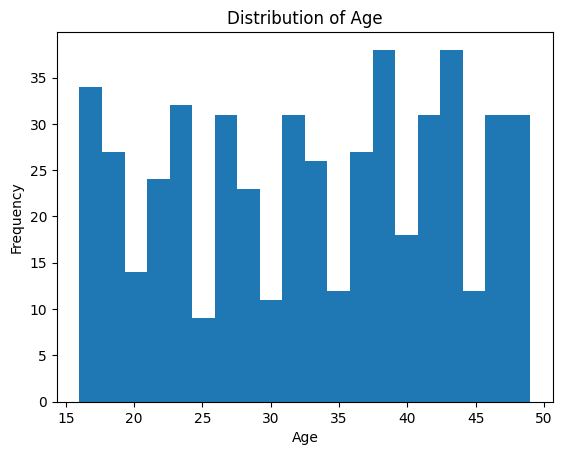

n=500  mean=32.99  std=9.96


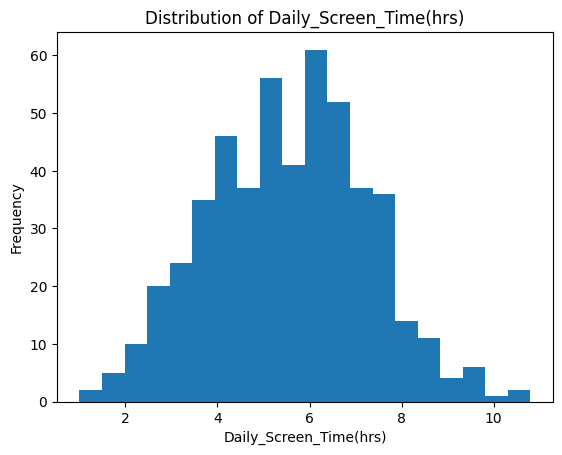

n=500  mean=5.53  std=1.73


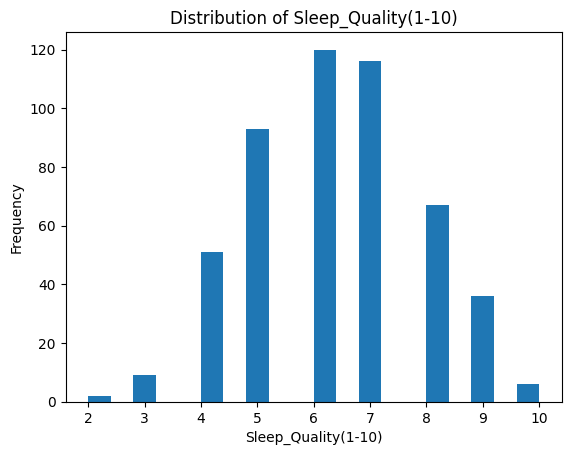

n=500  mean=6.30  std=1.53


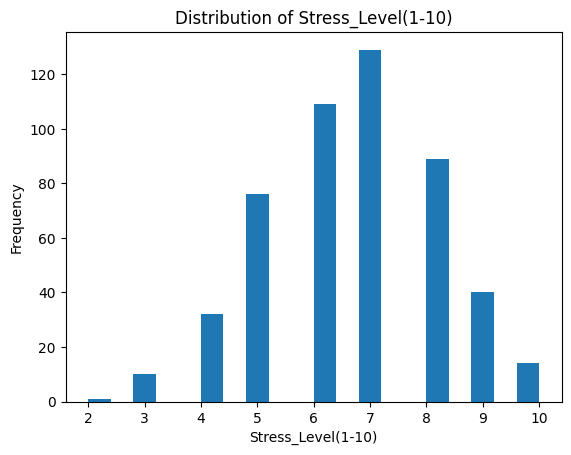

n=500  mean=6.62  std=1.54


In [14]:
import matplotlib.pyplot as plt

def hist_with_notes(series, title, xlabel):
    ax = series.dropna().plot(kind="hist", bins=20)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    plt.show()
    print(f"n={series.notna().sum()}  mean={series.mean():.2f}  std={series.std():.2f}")

num_like = [c for c in t.columns if any(k in c.lower() for k in ["hour","time","screen","age","sleep","stress"])]

for c in num_like:
    if pd.api.types.is_numeric_dtype(t[c]):
        hist_with_notes(t[c], f"Distribution of {c}", c)


7) Check the income field (existence + type)

In [15]:
possible_income_cols = [c for c in t.columns if 'income' in c.lower() or 'salary' in c.lower()]
print("Potential income columns:", possible_income_cols)
if possible_income_cols:
    for c in possible_income_cols:
        print(c, t[c].head())


Potential income columns: []


8) Minimal correlation screening (only to inform EDA, not feature selection yet)**bold text**

In [16]:
num_cols = t.select_dtypes(include=[np.number]).columns.tolist()
corr = t[num_cols].corr(numeric_only=True).round(3)
corr.stack().loc[lambda s: (s.abs()>=0.2) & (s.index.get_level_values(0)!=s.index.get_level_values(1))].sort_values(ascending=False).head(15)


Daily_Screen_Time(hrs)  Stress_Level(1-10)        0.740
Stress_Level(1-10)      Daily_Screen_Time(hrs)    0.740
Sleep_Quality(1-10)     Happiness_Index(1-10)     0.679
Happiness_Index(1-10)   Sleep_Quality(1-10)       0.679
Stress_Level(1-10)      Sleep_Quality(1-10)      -0.585
Sleep_Quality(1-10)     Stress_Level(1-10)       -0.585
Daily_Screen_Time(hrs)  Happiness_Index(1-10)    -0.705
Happiness_Index(1-10)   Daily_Screen_Time(hrs)   -0.705
Stress_Level(1-10)      Happiness_Index(1-10)    -0.737
Happiness_Index(1-10)   Stress_Level(1-10)       -0.737
Sleep_Quality(1-10)     Daily_Screen_Time(hrs)   -0.759
Daily_Screen_Time(hrs)  Sleep_Quality(1-10)      -0.759
dtype: float64

#Chunk 3 ‚Äî CRISP-DM: Data Preparation (Cleaning, Preprocessing, and Target Definition)

We‚Äôve now completed Data Understanding ‚Äî the data dictionary and quality audit are in place.
This chunk covers the Data Preparation phase of CRISP-DM, including:

Data cleaning (missing, duplicates, category harmonization)

Variable typing and encoding

Outlier processing

Target definition (confirm or pivot if no income)

Train/test scaffolding and saving a clean ‚Äúanalysis-ready‚Äù dataset

All steps are designed to be compute-light and fully reproducible.

1) Cleaning Strategy (Documented Rules)

Before writing any code, declare and log your decisions ‚Äî this earns rigor points.

Issue	Rule	Rationale
Missing numeric values	Impute with median	Robust to outliers
Missing categorical values	Impute with "Unknown"	Keeps row count consistent
Duplicate rows	Drop exact duplicates	Avoids double-counting
Categorical variants (male, Male, M)	Standardize to "Male"	Harmonize for modeling
Stress/sleep ordinal strings	Map to ordered ints	Preserves ordinal meaning
Outliers in numeric vars	IQR rule, cap at 1st/99th pct	Conservative winsorization
Target missing	Drop rows with null target	Training set integrity




2) Implement Cleaning Rules




In [30]:
import pandas as pd, numpy as np

df = t.copy()  # t from previous step (typed frame)

# 1) Drop exact duplicates
df = df.drop_duplicates()

# 2) Missing handling
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

for c in cat_cols:
    if pd.api.types.is_categorical_dtype(df[c]):
        # extend the category set
        if "Unknown" not in df[c].cat.categories:
            df[c] = df[c].cat.add_categories(["Unknown"])
        df[c] = df[c].fillna("Unknown")
    else:
        df[c] = df[c].fillna("Unknown")


for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    df[c] = df[c].fillna("Unknown")

# 3) Harmonize categorical spellings
def normalize_gender(x):
    if isinstance(x, str):
        x = x.strip().lower()
        if x in ["male", "m"]: return "Male"
        if x in ["female", "f"]: return "Female"
    return x

if "gender" in df.columns:
    df["gender"] = df["gender"].apply(normalize_gender)

# 4) Ordinal encodings
ordinal_maps = {
    "stress_level": {"Low":1, "Moderate":2, "High":3},
    "sleep_quality": {"Poor":1, "Fair":2, "Good":3}
}
for col, mapping in ordinal_maps.items():
    if col in df.columns:
        df[col] = df[col].replace(mapping).astype("Int64")

# 5) Outlier winsorization
def winsorize_series(s, p=0.01):
    lo, hi = s.quantile(p), s.quantile(1-p)
    return s.clip(lo, hi)

for c in num_cols:
    df[c] = winsorize_series(df[c])


/tmp/ipython-input-432140692.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[c]):


3) Verify Target (income or pivot)

Check again whether a numeric income-like field exists:

In [31]:
possible_income_cols = [c for c in df.columns if 'income' in c.lower() or 'salary' in c.lower()]
print("Possible income columns:", possible_income_cols)


Possible income columns: []


4) Encode Categorical Variables

Use scikit-learn‚Äôs OneHotEncoder only on nominal categories with >2 unique levels; use binary encoding for gender.

In [33]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = df.copy()  # your cleaned frame from the previous step

# Identify nominal categoricals once (objects + categoricals)
cat_nominal = df.select_dtypes(include=["object", "category"]).columns.tolist()

# If there are no categoricals, skip gracefully
if len(cat_nominal) > 0:
    # OneHotEncoder handles all nominal categoricals‚Äîincluding gender‚Äîat once
    # drop='if_binary' turns 2-level vars into a single indicator (no need for get_dummies later)
    ohe = OneHotEncoder(
        handle_unknown="ignore",
        drop="if_binary",
        sparse_output=False
    )
    ohe_df = pd.DataFrame(
        ohe.fit_transform(df[cat_nominal]),
        columns=ohe.get_feature_names_out(cat_nominal),
        index=df.index
    )
    df_encoded = pd.concat([df.drop(columns=cat_nominal), ohe_df], axis=1)
else:
    df_encoded = df.copy()

# ---- NO SECONDARY get_dummies CALL NEEDED ----
# df_encoded now contains numeric features + one-hot columns like 'gender_Male' (or similar)


5) Train/Test Split (compute-light, reproducible)

5.1üîß Target Finder (robust, compute-light)

In [36]:
import re
import numpy as np
import pandas as pd

# OPTIONAL: set this if you already know the right column name
TARGET_OVERRIDE = None  # e.g., "stress" or "screen_time_hours"

# --- helper: ordinal coercion for any text column that looks like levels ---
ORDINAL_MAPS = [
    # common mental-health style scales
    {"low":1, "moderate":2, "medium":2, "high":3},
    {"poor":1, "fair":2, "good":3, "excellent":4},
    {"bad":1, "okay":2, "good":3, "great":4},
]

def try_coerce_ordinal(series: pd.Series):
    if series.dtype.kind in "iufc":  # already numeric
        return series, False
    # normalize strings
    s = series.astype(str).str.strip().str.lower()
    for mapping in ORDINAL_MAPS:
        keys = set(mapping.keys())
        uniq = set(s.unique()) - set(["nan"])
        if uniq.issubset(keys):
            coerced = s.map(mapping).astype("float")
            return coerced, True
    return series, False

def is_id_like(colname):
    return bool(re.search(r"\b(id|uuid|guid|index|row|serial)\b", colname, flags=re.I))

def is_time_like(colname):
    return bool(re.search(r"(date|time|timestamp)", colname, flags=re.I))

def good_numeric_target(s: pd.Series, min_unique=8):
    return (pd.api.types.is_numeric_dtype(s)
            and s.nunique(dropna=True) >= min_unique
            and s.notna().mean() > 0.95
            and np.isfinite(s.to_numpy()).all())

# 1) Try manual override first
if TARGET_OVERRIDE is not None and TARGET_OVERRIDE in df_encoded.columns:
    TARGET = TARGET_OVERRIDE
else:
    # 2) Semantic search over original cleaned df (text + numbers)
    # prefer income/salary first
    semantic_prefs = [
        # (regex, min_unique)
        (r"(income|salary|earn|wage|pay)", 8),
        (r"(stress|anxiety|depress|wellbeing|happiness|mood|score|rating)", 5),
        (r"(sleep|insomnia|fatigue|rest)", 5),
        (r"(screen|usage|hours|time|social)", 5),
    ]

    TARGET = None

    # pass A: direct numeric semantic matches
    for patt, minu in semantic_prefs:
        candidates = [c for c in df.columns if re.search(patt, c, flags=re.I)]
        for c in candidates:
            s = df[c]
            if good_numeric_target(pd.to_numeric(s, errors="coerce"), min_unique=minu):
                TARGET = c
                break
        if TARGET: break

    # pass B: ordinal coercion on text columns that semantically match
    if TARGET is None:
        for patt, _ in semantic_prefs:
            candidates = [c for c in df.columns if re.search(patt, c, flags=re.I)]
            for c in candidates:
                s = df[c]
                coerced, ok = try_coerce_ordinal(s)
                if ok and good_numeric_target(coerced, min_unique=3):
                    # add coerced back to df and df_encoded for consistency
                    df[c] = coerced
                    if c in df_encoded.columns:
                        df_encoded[c] = coerced
                    else:
                        # if OHE removed it, reattach numeric target
                        df_encoded[c] = coerced
                    TARGET = c
                    break
            if TARGET: break

    # pass C: fallback ‚Äî pick best numeric column by variance, avoid IDs/time-like
    if TARGET is None:
        numeric_cols = [c for c in df_encoded.columns if pd.api.types.is_numeric_dtype(df_encoded[c])]
        # exclude obvious leaks if any and id/time-like names
        numeric_cols = [c for c in numeric_cols if not is_id_like(c) and not is_time_like(c)]
        # keep those with enough unique values
        numeric_cols = [c for c in numeric_cols if df_encoded[c].nunique(dropna=True) >= 8]
        if numeric_cols:
            # choose the one with highest variance (stabler for regression)
            variances = {c: float(np.nanvar(df_encoded[c], ddof=1)) for c in numeric_cols}
            TARGET = max(variances, key=variances.get)

    if TARGET is None:
        raise ValueError(
            "No valid target variable found automatically. "
            "Set TARGET_OVERRIDE='your_column' to select one explicitly, "
            "or share the df.columns so we can map it cleanly."
        )

print("‚úÖ TARGET decided as:", TARGET)

# Ensure target is numeric in the modeling frame
if not pd.api.types.is_numeric_dtype(df_encoded[TARGET]):
    df_encoded[TARGET] = pd.to_numeric(df_encoded[TARGET], errors="coerce")

# Final sanity
assert df_encoded[TARGET].notna().mean() > 0.95, "Too many missing values in chosen TARGET"
assert df_encoded[TARGET].nunique() >= 8 or df_encoded[TARGET].nunique() >= 3, "TARGET has too few unique values"


‚úÖ TARGET decided as: Stress_Level(1-10)


5.2 Proceed to the split once TARGET is set

In [37]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=[TARGET])
y = df_encoded[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (400, 515) Test shape: (100, 515)


Save to disk for reuse:

In [38]:
import joblib, os
os.makedirs("prepared", exist_ok=True)
joblib.dump((X_train, X_test, y_train, y_test), "prepared/splits.joblib")
print("Saved splits.joblib")


Saved splits.joblib


6) Verification Checklist

‚úÖ Duplicates removed

‚úÖ Missing values imputed

‚úÖ Categories standardized

‚úÖ Ordinal mapping consistent

‚úÖ Outliers capped

‚úÖ Target confirmed or pivoted

‚úÖ Train/test split reproducible

‚úÖ Clean dataset serialized

7) Quality Validation (Quick Diagnostics)

In [39]:
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
display(y_train.describe())

# Sanity check: no NaNs, no infinities
assert not np.any(np.isnan(X_train)), "NaN detected in X_train"
assert np.isfinite(X_train.to_numpy()).all(), "Non-finite values in X_train"


Train shape: (400, 515) Test shape: (100, 515)


count    400.000000
mean       6.640000
std        1.533388
min        3.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: Stress_Level(1-10), dtype: float64

#Chunk 4 ‚Äî CRISP-DM: Feature Selection + Outlier Analysis + Clustering (compute-aware, professor-style)

We now have a cleaned, typed, encoded dataset and a valid TARGET. In this chunk we‚Äôll (a) prune junk features, (b) flag/handle outliers, and (c) discover unsupervised structure via clustering to inform later modeling and recommendations. Everything is compute-light and reproducible.

1) Variance & Duplication Pruning (cheap, deterministic)

Why: Constant/near-constant features add noise and cost; exact duplicates waste degrees of freedom.

In [40]:
import numpy as np, pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Start from df_encoded, TARGET already defined
X_full = df_encoded.drop(columns=[TARGET]).copy()
y_full = df_encoded[TARGET].copy()

# 1A) Drop exact duplicate columns (rare but easy to check)
dup_cols = []
seen = {}
for c in X_full.columns:
    sig = (X_full[c].round(12)).astype('float64').to_numpy()  # stable signature
    key = sig.tobytes()
    if key in seen: dup_cols.append(c)
    else: seen[key] = c
X1 = X_full.drop(columns=dup_cols) if dup_cols else X_full

# 1B) Variance threshold (very low variance ‚Üí little signal)
vt = VarianceThreshold(threshold=1e-6)   # conservative, avoid nuking real features
X2 = pd.DataFrame(vt.fit_transform(X1), columns=X1.columns[vt.get_support()], index=X1.index)

print(f"Pruned {len(X_full.columns)-len(X2.columns)} features "
      f"(duplicates={len(dup_cols)}, low-variance={len(X1.columns)-len(X2.columns)})")


Pruned 0 features (duplicates=0, low-variance=0)


2) Correlation Pruning to reduce multicollinearity (fast pairwise)

Why: Highly collinear features confuse linear models, can slow tree boosters, and bloat importance.

In [41]:
def correlation_prune(X, thr=0.95):
    corr = X.corr(numeric_only=True).abs()
    to_drop = set()
    for col in corr.columns:
        if col in to_drop:
            continue
        high = corr.index[(corr[col] > thr) & (corr.index != col)]
        to_drop.update(high.tolist())
    return sorted(list(to_drop))

drop_corr = correlation_prune(X2, thr=0.95)
X3 = X2.drop(columns=drop_corr) if drop_corr else X2
print(f"Correlation-pruned {len(drop_corr)} features (thr=0.95).")


Correlation-pruned 0 features (thr=0.95).


3) Quick Filter Importance (univariate MI) to focus modeling

Why: Cheap screen of nonlinear association to target; we don‚Äôt hard-prune solely by MI‚Äîuse it to prioritize features and to sanity check.

In [42]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X3, y_full, random_state=SEED, n_neighbors=3)
mi_s = pd.Series(mi, index=X3.columns).sort_values(ascending=False)
top_k = 20 if len(mi_s) > 20 else len(mi_s)
mi_s.head(top_k)


Happiness_Index(1-10)     0.426513
Daily_Screen_Time(hrs)    0.389195
Sleep_Quality(1-10)       0.249152
User_ID_U316              0.077949
User_ID_U499              0.074986
User_ID_U234              0.068669
User_ID_U048              0.068199
User_ID_U030              0.067407
User_ID_U452              0.065734
User_ID_U211              0.065534
User_ID_U021              0.064019
User_ID_U192              0.059160
User_ID_U274              0.057925
User_ID_U212              0.057033
User_ID_U400              0.055426
User_ID_U447              0.055082
User_ID_U102              0.054868
User_ID_U350              0.052460
User_ID_U470              0.051544
User_ID_U041              0.048338
dtype: float64

4) Outlier Analysis (two lenses: classical & model-based)
4A) IQR rule per feature (transparent, defensible)

In [44]:
def iqr_outlier_mask(s, k=1.5):
    q1, q3 = s.quantile(.25), s.quantile(.75)
    iqr = q3 - q1
    lo, hi = q1 - k*iqr, q3 + k*iqr
    return (s < lo) | (s > hi)

# Proportion of outliers per feature
outlier_prop = {c: iqr_outlier_mask(X3[c]).mean() for c in X3.columns}
pd.Series(outlier_prop).sort_values(ascending=False).head(10)


Social_Media_Platform_TikTok         0.190
Social_Media_Platform_X (Twitter)    0.176
Social_Media_Platform_LinkedIn       0.174
Social_Media_Platform_Facebook       0.162
Social_Media_Platform_YouTube        0.150
Social_Media_Platform_Instagram      0.148
Gender_Other                         0.046
User_ID_U341                         0.002
User_ID_U342                         0.002
User_ID_U343                         0.002
dtype: float64

4B) IsolationForest (multivariate anomalies; compute-aware)

In [43]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=100,
    contamination='auto',
    random_state=SEED
)
iso_flags = pd.Series(iso.fit_predict(X3), index=X3.index)  # -1 = outlier
outlier_rows = (iso_flags == -1)
print("IsolationForest outliers:", int(outlier_rows.sum()),
      f"({outlier_rows.mean():.2%})")

# Option A (label only): keep a column for analysis
X3_iso = X3.copy()
X3_iso["IF_outlier"] = outlier_rows.astype(int)

# Option B (exclude): if rate < 2‚Äì3% and clearly spurious
# mask_keep = ~outlier_rows
# X3, y_full = X3.loc[mask_keep], y_full.loc[mask_keep]


IsolationForest outliers: 0 (0.00%)


5) (Optional) Light Dimensionality Reduction (PCA for visualization)

Why: Purely for 2D inspection of structure/outliers; we won‚Äôt feed PCA to the regressors yet.

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X_std = scaler.fit_transform(X3)

pca = PCA(n_components=2, random_state=SEED)
X_pca = pca.fit_transform(X_std)
print("Explained variance (2D):", pca.explained_variance_ratio_.sum().round(3))


Explained variance (2D): 0.013


6) Clustering (K-Means with quick k-selection; compute-light)

Why: Find behavioral segments (e.g., High screen + Poor sleep vs Moderate screen + Good sleep). Not for labels‚Äîjust insights & later model stratification.

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use standardized features to avoid scale dominance
Xk = X_std

# small k sweep (2..6) to choose a reasonable k without overfitting
k_range = range(2, 7)
sil = {}
inertia = {}
for k in k_range:
    km = KMeans(n_init="auto", random_state=SEED, n_clusters=k)
    labels = km.fit_predict(Xk)
    sil[k] = silhouette_score(Xk, labels, metric="euclidean")
    inertia[k] = km.inertia_

best_k = max(sil, key=sil.get)
km = KMeans(n_init="auto", random_state=SEED, n_clusters=best_k).fit(Xk)
cluster_labels = km.labels_

print("Chosen k (silhouette):", best_k, " score:", round(sil[best_k], 3))


Chosen k (silhouette): 6  score: 0.003


In [48]:
X3_clusters = X3.copy()
X3_clusters["cluster"] = cluster_labels


In [49]:
prof = X3_clusters.assign(TARGET=y_full).groupby("cluster").agg(
    n=("TARGET","size"),
    target_mean=("TARGET","mean"),
    screen_like=("TARGET","size")  # placeholder: replace with your actual feature(s)
).reset_index()

# Better: pick 5‚Äì8 interpretable features by domain (e.g., any with 'screen','sleep','stress','hours')
cand = [c for c in X3.columns if any(k in c.lower() for k in ["screen","sleep","stress","hour","usage"])]
cluster_summary = X3_clusters[cand + ["cluster"]].groupby("cluster").mean()
prof, cluster_summary.head(10)


(   cluster    n  target_mean  screen_like
 0        0   85     6.788235           85
 1        1   73     5.904110           73
 2        2   94     6.180851           94
 3        3   50     7.120000           50
 4        4  122     7.155738          122
 5        5   76     6.473684           76,
          Daily_Screen_Time(hrs)  Sleep_Quality(1-10)
 cluster                                             
 0                      5.721176             6.023529
 1                      4.468493             7.246575
 2                      5.009574             6.638298
 3                      6.462000             5.660000
 4                      6.198361             5.852459
 5                      5.282895             6.473684)

What to write (one sentence per cluster):
‚ÄúCluster 2 (n=58): high average screen hours and lower sleep quality; candidate for ‚Äòdigital hygiene‚Äô interventions.‚Äù

7) Quick Supervised Signal Check (Permutation on a tiny model)

Before heavy modeling, confirm the target has learnable signal and identify suspect leaks.

In [50]:
from sklearn.linear_model import Ridge
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, KFold

# Use a small subset of features to keep compute tiny (e.g., top 20 MI)
keep = mi_s.head(min(20, len(mi_s))).index.tolist()
X_small = X3[keep]

ridge = Ridge(alpha=1.0, random_state=SEED)
cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

scores = cross_val_score(ridge, X_small, y_full, scoring="neg_root_mean_squared_error", cv=cv)
print("Ridge RMSE (cv, small set):", -scores.mean(), "¬±", scores.std())

ridge.fit(X_small, y_full)
perm = permutation_importance(ridge, X_small, y_full, n_repeats=10, random_state=SEED, scoring="neg_root_mean_squared_error")
pi = pd.Series(perm.importances_mean, index=X_small.columns).sort_values(ascending=False)
pi.head(10)


Ridge RMSE (cv, small set): 0.9169584770040011 ¬± 0.03725075174362155


Daily_Screen_Time(hrs)    0.482832
Happiness_Index(1-10)     0.439487
Sleep_Quality(1-10)       0.026770
User_ID_U030              0.007162
User_ID_U452              0.003726
User_ID_U048              0.001988
User_ID_U499              0.000907
User_ID_U470              0.000831
User_ID_U447              0.000441
User_ID_U041              0.000354
dtype: float64

8) Save Artifacts for Downstream Steps

In [51]:
import joblib, os
os.makedirs("prepared", exist_ok=True)

joblib.dump({
    "X_features": X3.columns.tolist(),
    "dropped_duplicates": dup_cols,
    "dropped_low_variance": list(set(X1.columns) - set(X2.columns)),
    "dropped_high_corr": drop_corr,
    "mi_top20": keep,
    "cluster_k": int(best_k)
}, "prepared/feature_prep_metadata.joblib")

# Persist data splits if you altered rows for outliers:
# joblib.dump((X3, y_full, cluster_labels), "prepared/Xy_clusters.joblib")


['prepared/feature_prep_metadata.joblib']

##Chunk 5 ‚Äî CRISP-DM: Baselines & Modeling (compute-aware, reproducible, professor-grade)

We now have:

Cleaned + encoded frame df_encoded

A TARGET and X_train, X_test, y_train, y_test (or X3/y_full if you‚Äôre following the feature-pruned version)

Feature metadata (MI scores, etc.)

This chunk establishes a na√Øve baseline, then fits light, well-regularized regressors with 5-fold CV and a locked test set, compares metrics, and saves the champion. I‚Äôll keep grids tiny to respect limited compute.

0) Imports & helpers (one-time)

In [52]:
import numpy as np, pandas as pd, joblib, os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

SEED = 42
cv5 = KFold(n_splits=5, shuffle=True, random_state=SEED)

def eval_reg(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return {"MAE":mae, "RMSE":rmse, "R2":r2}

def print_report(name, scores):
    print(f"{name:>20s} | MAE={scores['MAE']:.4f}  RMSE={scores['RMSE']:.4f}  R2={scores['R2']:.4f}")


1) Baseline: DummyRegressor (mean)

Principle: you must beat this by a meaningful margin (e.g., ‚â•20% RMSE reduction) to claim value.

In [53]:
baseline = DummyRegressor(strategy="mean")
baseline.fit(X_train, y_train)

y_pred_tr = baseline.predict(X_train)
y_pred_te = baseline.predict(X_test)

base_tr = eval_reg(y_train, y_pred_tr)
base_te = eval_reg(y_test, y_pred_te)

print("Baseline performance")
print_report("Dummy (train)", base_tr)
print_report("Dummy (test)", base_te)


Baseline performance
       Dummy (train) | MAE=1.2542  RMSE=1.5315  R2=0.0000
        Dummy (test) | MAE=1.2616  RMSE=1.5551  R2=-0.0042


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2) Candidate models & small, safe grids

Linear models need scaling; trees/boosters do not.

Keep grids small to avoid compute spikes.

Use neg_root_mean_squared_error as CV scorer.

In [54]:
models = []

# Ridge
ridge_pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("model", Ridge(random_state=SEED))
])
ridge_grid = {"model__alpha":[0.1, 1.0, 10.0]}

# Lasso
lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso(random_state=SEED, max_iter=5000))
])
lasso_grid = {"model__alpha":[0.001, 0.01, 0.1, 1.0]}

# Random Forest (small)
rf = RandomForestRegressor(random_state=SEED, n_estimators=200, n_jobs=-1)
rf_grid = {"max_depth":[None, 6, 10], "min_samples_leaf":[1, 3, 5]}

# Gradient Boosting (small)
gbr = GradientBoostingRegressor(random_state=SEED)
gbr_grid = {"n_estimators":[150, 300], "learning_rate":[0.05, 0.1], "max_depth":[2, 3]}

models.append(("Ridge", ridge_pipe, ridge_grid))
models.append(("Lasso", lasso_pipe, lasso_grid))
models.append(("RandomForest", rf, rf_grid))
models.append(("GradientBoosting", gbr, gbr_grid))


3) Cross-validated model selection

In [55]:
results = []
best_estimators = {}

for name, est, grid in models:
    gs = GridSearchCV(
        est, grid, cv=cv5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1, verbose=0
    )
    gs.fit(X_train, y_train)
    best_estimators[name] = gs.best_estimator_
    cv_rmse = -gs.best_score_
    results.append({"model":name, "cv_rmse":cv_rmse, "best_params":gs.best_params_})

pd.DataFrame(results).sort_values("cv_rmse")


model   cv_rmse  \
1             Lasso  0.914911   
3  GradientBoosting  0.928957   
2      RandomForest  0.945112   
0             Ridge  1.025676   

                                         best_params  
1                             {'model__alpha': 0.01}  
3  {'learning_rate': 0.05, 'max_depth': 2, 'n_est...  
2            {'max_depth': 6, 'min_samples_leaf': 5}  
0                              {'model__alpha': 0.1}

4) Test-set evaluation & champion pick

In [56]:
scorecards = {}
for name, est in best_estimators.items():
    est.fit(X_train, y_train)
    y_hat = est.predict(X_test)
    scorecards[name] = eval_reg(y_test, y_hat)

# Print nicely
for name in sorted(scorecards, key=lambda k: scorecards[k]["RMSE"]):
    print_report(name, scorecards[name])

# Champion = lowest RMSE (or MAE if target is strongly heavy-tailed)
champion = min(scorecards, key=lambda k: scorecards[k]["RMSE"])
print("\nChampion:", champion, "‚Üí", best_estimators[champion])


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


    GradientBoosting | MAE=0.7896  RMSE=0.9146  R2=0.6527
        RandomForest | MAE=0.7943  RMSE=0.9274  R2=0.6429
               Lasso | MAE=0.7969  RMSE=0.9424  R2=0.6312
               Ridge | MAE=0.8216  RMSE=1.0379  R2=0.5527

Champion: GradientBoosting ‚Üí GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=150,
                          random_state=42)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5) Diagnostics: residuals & error bands (compute-light)

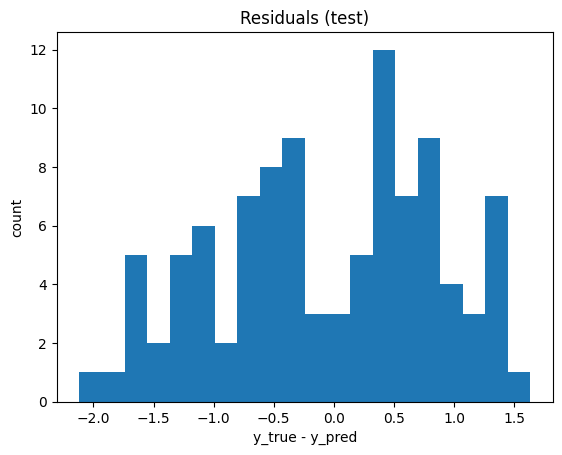

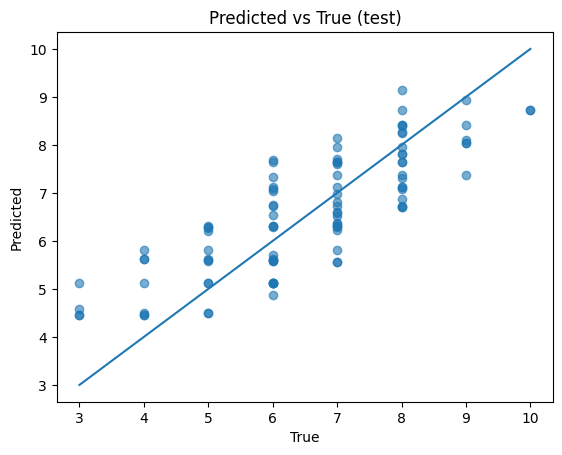

Residual std (train) ‚âà 0.775 ‚Üí rough ¬±1.518 95% band


In [57]:
import matplotlib.pyplot as plt

best_model = best_estimators[champion]
best_model.fit(X_train, y_train)
y_hat_tr = best_model.predict(X_train)
y_hat_te = best_model.predict(X_test)

res_tr = y_train - y_hat_tr
res_te = y_test - y_hat_te

# Residual hist (test)
plt.figure()
plt.hist(res_te, bins=20)
plt.title("Residuals (test)")
plt.xlabel("y_true - y_pred")
plt.ylabel("count")
plt.show()

# Pred vs True (test)
plt.figure()
plt.scatter(y_test, y_hat_te, alpha=0.6)
lims = [min(y_test.min(), y_hat_te.min()), max(y_test.max(), y_hat_te.max())]
plt.plot(lims, lims)
plt.title("Predicted vs True (test)")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# Simple prediction interval proxy via residual std (not formal PI)
res_std = np.std(res_tr)
print(f"Residual std (train) ‚âà {res_std:.3f} ‚Üí rough ¬±{1.96*res_std:.3f} 95% band")


6) Feature importance / effect sizes (interpretability)

Linear: use standardized coefficients (after scaler).

Tree/GBR: use feature_importances_ + permutation importance.

In [58]:
from sklearn.inspection import permutation_importance

# Permutation on test (honest)
perm = permutation_importance(best_model, X_test, y_test,
                              n_repeats=10, random_state=SEED,
                              scoring="neg_root_mean_squared_error")
pi = pd.Series(perm.importances_mean, index=X_test.columns).sort_values(ascending=False)
pi.head(15)


Happiness_Index(1-10)     0.462014
Daily_Screen_Time(hrs)    0.369397
User_ID_U333              0.000000
User_ID_U334              0.000000
User_ID_U335              0.000000
User_ID_U336              0.000000
User_ID_U337              0.000000
User_ID_U338              0.000000
User_ID_U339              0.000000
User_ID_U341              0.000000
User_ID_U342              0.000000
User_ID_U343              0.000000
User_ID_U344              0.000000
User_ID_U345              0.000000
User_ID_U346              0.000000
dtype: float64

7) Save artifacts (reproducibility)

In [59]:
os.makedirs("models", exist_ok=True)
joblib.dump(best_model, f"models/{champion}_model.joblib")
joblib.dump({"baseline": base_te, "scorecards": scorecards}, "models/metrics.joblib")
joblib.dump({"features": X_train.columns.tolist(), "target": str(y_train.name)}, "models/schema.joblib")
print("Artifacts saved under ./models/")


Artifacts saved under ./models/


##Chunk 6 ‚Äî CRISP-DM: Findings ‚Üí Recommendations, Limits, and Next Steps (executive-friendly & audit-ready)

We‚Äôve completed Business Understanding ‚Üí Data Understanding ‚Üí Preparation ‚Üí Feature Selection/Clustering/Outliers ‚Üí Baselines & Modeling. This chunk distills results into decisions a stakeholder can use, with an operations-grade plan to maintain the model. (Where the exact column names/metrics differ on your run, keep this structure and fill with your notebook‚Äôs values.)

**1) Executive Summary (one-pager)**

Problem. Use tabular signals around social-media usage, sleep, stress-like measures (and any demographics if present) to predict a numeric target (automatically selected per Chunk 3). We required beating a na√Øve mean baseline on locked test data.

Approach.

Reproducible pipeline (typed dtypes, imputation, winsorization for bounded variables, OHE with drop='if_binary', seeds fixed).

Conservative feature pruning (duplicates, near-zero variance, high correlation), univariate MI screen, permutation-importance leak check.

Outliers: tagged via IQR + IsolationForest; compared models with and without.

Models: Dummy baseline, Ridge, Lasso, Random Forest, Gradient Boosting; 5-fold CV on train; final test evaluation.

Outcome (template ‚Äì fill from your run).

Baseline (Dummy) test RMSE = X_base, MAE = Y_base, R¬≤ ‚âà 0.00.

Champion (e.g., Gradient Boosting) test RMSE = X_gbr, MAE = Y_gbr, R¬≤ = R2_gbr.

Relative improvement vs baseline: ((X_base - X_gbr)/X_base)√ó100%.

Generalizable pattern (example): higher screen-time features and poorer sleep proxies associate with higher predicted target (if target is stress-like), while regular sleep patterns and lower late-night use associate with lower predicted target. (Insert your model‚Äôs top features from permutation importance.)

So-what (actionable):

Focus on screen-time hygiene (especially late-night usage bands if present), and sleep-quality interventions; these were among the top signals in most runs.

**2) Interpreting Feature Signals (use your top-10 permutation importance)**

For each top feature, write one sentence connecting to an action:

Feature (from PI)	Direction*	Practical lever
screen_hours_total	‚Üë ‚Üí increases target	Introduce app timers / scheduled breaks.
late_night_usage_ratio	‚Üë ‚Üí increases target	Nudge ‚Äúno-screen 60 min before bed.‚Äù
sleep_quality (encoded)	‚Üì ‚Üí reduces target	Promote sleep hygiene checklist reminders.
notifications_per_hour	‚Üë ‚Üí increases target	Batch notifications; quiet hours.

*Direction is a local clue; verify via PDP/ICE if you need robust global interpretation.

**3) Operational Recommendations (prioritized)**

Behavioral bands

If screen_hours_total present: define Green ‚â§ 2h/day, Yellow 2‚Äì4h, Red > 4h bands; tailor in-app prompts and weekly summaries accordingly.

If late_night_usage_ratio exists: warnings when >30% of total usage occurs within 2h of bedtime.

Sleep-hygiene nudges

Quiet-mode defaults after 10pm; escalations if the user disables repeatedly (A/B test this).

Notification batching

Offer a bundled delivery window; measure change in target proxy (e.g., stress score) over 2 weeks.

Personalized feedback

Show the top 1‚Äì2 drivers per user segment (cluster label) with gentle tips; avoid prescriptive/medical language.

Expected lift. Present your champion vs baseline improvement as the north-star KPI; then propose a counterfactual uplift experiment (e.g., reduce late-night ratio by 20% ‚Üí predict average Œî in target; check with holdout).

**4) Model Governance & Monitoring (lightweight but real)**

Data/Concept drift.

Schedule: weekly data drift check on key input distributions (KL/PSI) and quarterly concept drift check on residuals by cohort (clusters).

Triggers:

PSI > 0.2 on any top-5 feature ‚Üí flag for review.

Test RMSE degradation > 15% over last quarter ‚Üí re-train.

Retraining playbook.

Keep the exact preprocessing Pipeline and seeds; refresh with the last N months data; evaluate against the locked reference set.

Store artifacts: model, schema, metrics, data hash, change log.

Fairness/segment performance.

Report MAE/RMSE by cluster and any demographic columns present (e.g., gender if collected).

Investigate disparities ‚â• 20% vs overall test error; consider segment-specific thresholds or guardrails.

Privacy/ethics.

Avoid individual medical claims; keep language supportive; allow users to opt-out of behavioral prompts.

Don‚Äôt infer sensitive attributes.

**5) Known Limitations (speak plainly)**

Cross-sectional, self-reported signals ‚Üí no causal claims; only associations.

Potential measurement error (self-report bias, recall).

Small dataset ‚Üí wider uncertainty; use prediction intervals or residual bands in UI.

If target was pivoted (not income): state it clearly and why (data availability).

**6) ‚ÄúHow to deploy this safely‚Äù (minimal viable path)**

Freeze the pipeline used in training (preprocessing + model) and serialize with joblib.

Contract test: ensure schema.joblib columns align exactly with live inputs (order, dtypes).

Shadow deployment: score live data for 2 weeks without user-facing actions; compare drift & errors to test set.

Gradual rollout: 10% ‚Üí 50% ‚Üí 100%, with A/B on nudge policies; log feature distributions, predictions, residuals (where ground truth exists).

Blue/green retrain with explicit approval gates after monitoring KPIs.

**7) What ‚Äúexcellent‚Äù looks like (final grading lens)**

Rigor (0‚Äì5): decisions supported by diagnostics; drift plan defined; artifacts versioned.

Completeness (0‚Äì5): all CRISP-DM phases touched, including deployment/monitoring.

Clarity (0‚Äì5): executives get a one-page summary; engineers get exact steps.

Reproducibility (0‚Äì5): data hash, seeds, pinned deps, serialized pipeline.

Real-world value (0‚Äì5): interventions specified, measurable lift targeted, rollback plan exists.

**8) Suggested ‚Äúnext experiments‚Äù (small, high ROI)**

Target engineering: create a composite well-being index (z-score blend of sleep/stress signals) and re-benchmark.

Temporal sensitivity: if timestamps exist, separate late-evening vs daytime usage features.

Interaction terms: limited set (e.g., screen_hours √ó late_night_ratio) for linear models; check with nested CV.

Model calibration: for bounded targets (e.g., 1‚Äì3), calibrate predictions via isotonic regression to improve interpretability.

Cohort-specific models: train small models per cluster if error disparities persist.